# Projekat: Multivarijabilna regresija nad Ames Housing Dataset-om

## Uvod
     Ovaj dataset se sastoji od 81 obelezja koje pokrivaju relevantne karakteristike trzista nekretnina u Ames,Iowa,USA. Problem sa ovim obelezjima cesto moze predstavljati cinjenica da su visoko korelirana i da nam bas ne treba svako ili nam cak mogu i odmognuti  u nalazenju tacnih cena nekretnina koje zelimo da predvidjamo, kao sto je to npr. preteratno poklapanje ili over-fitting. Cilj ovog projekta je da smanji broj obelezja na neki pristojan broj (u ovom slucaju da se smanji sa 81 na 50), koja ce pomoci u nalazenju optimalnih resenja, u skladu sa skromnim znanjem istrazivaca (nikakvim) i primenom raznih metoda smanjivanja i regularizacionih parametara. Cilj ovog projekta nije da napravi komercijalni niti kvalitetan algoritam, vec iskljucivo predstavlja istrazivacki rad koji u jednom slucaju cak i dovodi do neuspesnog rezultata.
     

# Pocetni unos biblioteka koje ce se koristiti u daljem projektu

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numbers 
import numpy as np
from sklearn.preprocessing import LabelEncoder
import copy
import random
%matplotlib inline

In [2]:
#moja metrika za r2 skor, ako bude potrebno u toku odbrane da se koristi

def r2_score_dusan(y_pred, y_orig):
    y_mean = y_orig.mean()
    SST = np.sum(np.square(y_orig - y_mean))
    SSR = np.sum(np.square(y_pred - y_mean))
    print(y_pred.shape)
    print(y_orig.shape)
    SSE = np.sum(np.square(y_pred - y_orig))
    
    
    return 1.0 - SSE/SST

### Iscitavanje podataka iz .csv datoteke u kojoj se nalaze podaci.


In [5]:
db_train = pd.read_csv('train.csv')
#os.listdir() # za listanje svih fajlova u datoteci

## Kao sto vidimo, ima 81 obelezje i 1460 uzoraka
## Takodje, prikazujemo i strukturu prvih 5 primera, ali s obzirom da ih ima previse moramo drugaciji postupak da vrsimo

In [6]:
print(db_train.head())
print(db_train.shape)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

## Ovo su obelezja koja se nalaze u nasem skupu vezanom za Housing

### Na osnovu obelezja ciji se tacan opis moze naci i u 'data_description.txt' , pretpostavio bih da ce postojati visoka korelacija izmedju obelezja koja se ticu medjusobne kvadrature spratova, i kvaliteta tih spratova. Rucno necu obavljati posao odabira obelezja, ostavicu matematickim alatima

In [7]:
db_train.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

## Pojedini tipovi nisu numericki, te se sa njima u tom obliku ne mogu vrsiti bilo kakve matematicke funkcije, vec su potrebne transformacije


In [8]:
for column in db_train.columns:
    print(db_train[column].dtype)

int64
int64
object
float64
int64
object
object
object
object
object
object
object
object
object
object
object
object
int64
int64
int64
int64
object
object
object
object
object
float64
object
object
object
object
object
object
object
int64
object
int64
int64
int64
object
object
object
object
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
object
int64
object
int64
object
object
float64
object
int64
int64
object
object
object
int64
int64
int64
int64
int64
int64
object
object
object
int64
int64
int64
object
object
int64


## Uklanjanje Id-a, jer nam je nepotreban za dalje resavanje
## Kao sto vidimo sa 81 smo pali na 80

In [9]:
db_train = db_train.drop('Id', axis = 1)

print(db_train.columns)
print(db_train.shape)

Index([u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Street',
       u'Alley', u'LotShape', u'LandContour', u'Utilities', u'LotConfig',
       u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2',
       u'BldgType', u'HouseStyle', u'OverallQual', u'OverallCond',
       u'YearBuilt', u'YearRemodAdd', u'RoofStyle', u'RoofMatl',
       u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'MasVnrArea',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath',
       u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual',
       u'TotRmsAbvGrd', u'Functional', u'Fireplaces', u'FireplaceQu',
       u'GarageType', u'GarageYrBlt', u'GarageFinish', u'GarageCars'

### Uklanjanje kolona tamo gde ih ima vise od 70% sa NaN vrednoscu

In [10]:
# #print(db_train.isna().sum()/db_train.size)

def print_diff(db_train, db_old):
    temp = [item for item in db_old if item not in db_train]
    print()
    print('Obelezja koja nedostaju su: ')
    print(temp)
    
db_old = copy.deepcopy(db_train)
db_train = db_train.dropna(axis = 1, thresh = 0.7*db_train.shape[0])

print_diff(db_train,db_old)

()
Obelezja koja nedostaju su: 
['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


### Kao sto se vidi uklonjeni su obelezja:
    Alley: koje oznacava nacin pristupa kuci
    FireplacesQu: kvalitet kamina 
    PoolQC: kvalitet bazena
    Fence: kvalitet ograde
    MiscFeature: ostale karakteristike koje nisu navedene u obelezjima (to je neko bezvezno samostalno obelezje)

### Sto znaci da ocigledno za veliki broj nekretnina ni ne postoji informacija o njima ili su izostavljene kao nepostojece u katastru.

### Sredjivanje null podataka, na non-numeric kolone menjamo najfrekventnijim vrednostima obelezja, a numeric menjamo medijanom podataka kolone

In [11]:
#za proveru da li je tip kolone numeric ili nije
# for column in db_train.columns:
#     print(str(type(db_train[column][0])) + str(isinstance(db_train[column][0], \
#     numbers.Number)))
    

for column in db_train.columns:
    if db_train[column].dtype not in [np.object, np.str]:
        #print(str(type(db_train[column][0])) + " " + column)
        db_train[column] = db_train[column].fillna(db_train[column].median())
    else:
        db_train[column] = db_train[column].fillna(db_train[column].mode()[0])

#provera da li je ostalo NaN vrednosti
print("Da li je ostalo bilo kakvih nepoznatih/null vrednosti? ")
print(db_train.isna().any().any())

Da li je ostalo bilo kakvih nepoznatih/null vrednosti? 
False


#### *Poslednja provera sluzi da se vidi da li sam dobro izvrsio funkciju ispunjavanja nepoznatih
### U zaglavlju uzorka se vidi da nema vise nepoznatih obelezja, mada vecu vaznost ima ispit funkcije trazenja NaN-a u prethodnoj celiji

In [12]:
#trenutno stanje 
print(db_train.head())

   MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope    ...    EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl    ...                0         0           0   
1    AllPub       FR2       Gtl    ...                0         0           0   
2    AllPub    Inside       Gtl    ...                0         0           0   
3    AllPub    Corner       Gtl    ...              272         0           0   
4    AllPub       FR2       Gtl    ...                0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondit

## Numerizacija podataka, tj pretvaranje 'string' vrednosti u kvantitativna obelezja

### Posto se bavimo samo predikcijom algoritma, umesto koriscenja nekih naprednih metoda transformacije podataka, koristicemo se label encoding-om iz scikit biblioteke, koja pretvara podatke iz string/object oblika u numericki oblik. Npr. ako obelezje ima domen od 5 non-numeric vrednosti, dodeljivace mu se vrednosti iz skupa {0,1,2,3,4}

#### Primer primene nad jednim obelezjem

In [13]:
#Primer na jednoj object/string koloni, recimo 'MSZoning', sa zonskom
#klasifikacijom nekretnine
# for column in db_train.columns:
#     if db_train[column].dtype == 'object':
#         print(db_train[column])

db_train['MSZoning'].head()

0    RL
1    RL
2    RL
3    RL
4    RL
Name: MSZoning, dtype: object

In [14]:
#koristimo label encoder
lb_make = LabelEncoder()
db_train['MSZoning'] = lb_make.fit_transform(db_train['MSZoning'])

db_train['MSZoning'].head()

0    3
1    3
2    3
3    3
4    3
Name: MSZoning, dtype: int64

#### Primena label encoding-a na ostalim obelezjima

In [15]:
#Primena na svim ostalim non-numeric kolonama
for column in db_train.columns:
    if db_train[column].dtype in ('object', 'str'):
       db_train[column] = lb_make.fit_transform(db_train[column])
        
print(db_train['Street'].dtype)
print(db_train['Street'].head())

int64
0    1
1    1
2    1
3    1
4    1
Name: Street, dtype: int64


### Pre regresije, standardizovacemo obelezja na pretpostavljene vrednost 0 i standardnu devijaciju 1, kako se ne bi desilo da pojedina obelezja imaju prednost u odnosu na ostala, vrsicemo standardizaciju tj.:
### (x - srednja_vrednost(x))/standardna_devijacija(x)

### Sledi predstavljanje normalizovanih obelezja

In [16]:
#stand_corr_db_train = (corr_db_train - corr_db_train.mean()) / corr_db_train.std()
proba = db_train.drop(columns = ['SalePrice'])
proba_y = db_train['SalePrice']
#proba = proba[['MSSubClass', 'MSZoning']] <- samo za proveru korisceno
#proba.columns
#print(proba[['MSSubClass','MSZoning']])

#proba = (proba - proba.mean())/proba.std()
#proba.head()
proba = (proba - proba.mean())/proba.std()


db_train = pd.concat([proba, proba_y], axis = 1)

print(db_train.head())



   MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0    0.073350 -0.045516    -0.220799 -0.207071  0.064216  0.750473   
1   -0.872264 -0.045516     0.460162 -0.091855  0.064216  0.750473   
2    0.073350 -0.045516    -0.084607  0.073455  0.064216 -1.378460   
3    0.309753 -0.045516    -0.447787 -0.096864  0.064216 -1.378460   
4    0.073350 -0.045516     0.641752  0.375020  0.064216 -1.378460   

   LandContour  Utilities  LotConfig  LandSlope    ...      EnclosedPorch  \
0     0.314559  -0.026171   0.604463  -0.225639    ...          -0.359202   
1     0.314559  -0.026171  -0.628101  -0.225639    ...          -0.359202   
2     0.314559  -0.026171   0.604463  -0.225639    ...          -0.359202   
3     0.314559  -0.026171  -1.860664  -0.225639    ...           4.091122   
4     0.314559  -0.026171  -0.628101  -0.225639    ...          -0.359202   

   3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  SaleType  \
0  -0.116299    -0.270116 -0.068668 -

## Krecemo sa uklanjanjem nepotrebnih obelezja, vrsimo uklanjanje:

    1)Korelacionom matricom sklanjamo one koji imaju aps korelaciju >=0.6

    2)PCA uklanjanjem/pravljenjem novih obelezja

### 1)Korelacionom matricom sklanjamo one koji imaju aps korelaciju >=0.6 , koristi se Pearson korelaciona matrica

Matrica koreliranja za sva obelezja


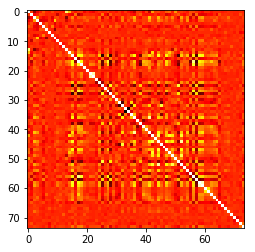

Kolone BldgType i MSSubClass su korelirane
Brise se kolona BldgType
Kolone Exterior2nd i Exterior1st su korelirane
Brise se kolona Exterior2nd
Kolone ExterQual i OverallQual su korelirane
Brise se kolona ExterQual
Kolone Foundation i YearBuilt su korelirane
Brise se kolona Foundation
Kolone BsmtQual i OverallQual su korelirane
Brise se kolona BsmtQual
Kolone BsmtFinSF2 i BsmtFinType2 su korelirane
Brise se kolona BsmtFinSF2
Kolone 1stFlrSF i TotalBsmtSF su korelirane
Brise se kolona 1stFlrSF
Kolone GrLivArea i 2ndFlrSF su korelirane
Brise se kolona GrLivArea
Kolone BsmtFullBath i BsmtFinSF1 su korelirane
Brise se kolona BsmtFullBath
Kolone FullBath i GrLivArea su korelirane
Brise se kolona FullBath
Kolone HalfBath i 2ndFlrSF su korelirane
Brise se kolona HalfBath
Kolone KitchenQual i ExterQual su korelirane
Brise se kolona KitchenQual
Kolone TotRmsAbvGrd i 2ndFlrSF su korelirane
Brise se kolona TotRmsAbvGrd
Kolone TotRmsAbvGrd i GrLivArea su korelirane
Brise se kolona TotRmsAbvGrd
Kolo

In [17]:
def trazi_korelirane(dataset):
    korelaciona_matrica  = dataset.corr()
    n = korelaciona_matrica.shape[0]
    skup_kolona_brisanje = set()
    
    #stari sastav obelezja
    print('Matrica koreliranja za sva obelezja')
    plt.imshow(korelaciona_matrica, cmap = 'hot', interpolation='nearest')
    plt.show()
    
    for i in range(n):
        for j in range(i):
            if abs(korelaciona_matrica.iloc[i][j]) >= 0.6 \
                    and korelaciona_matrica.iloc[i][j] != 1.0:
                ime_kolone = korelaciona_matrica.columns[i]
                print('Kolone ' + str(dataset.columns[i]) + ' i ' + str(dataset.columns[j]) +' su korelirane')
                print('Brise se kolona ' + str(dataset.columns[i]))
                #sluzi samo za proveru da li se uopste nalazi 
                if ime_kolone in db_train.columns:
                    skup_kolona_brisanje.add(ime_kolone)
                    
    print("\n\n")
    return skup_kolona_brisanje
                
# korelaciona_matrica.drop(columns = skup_kolona_brisanje)
# print(skup_kolona_brisanje)
# korelaciona_matrica.drop(columns = skup_kolona_brisanje, inplace= True)
# korelaciona_matrica.shape

corr_db_train = db_train
Y_corr = corr_db_train['SalePrice']
corr_db_train = corr_db_train.drop(columns = ['SalePrice'])
#kolone koje treba obrisati
kolone_za_brisanje = trazi_korelirane(corr_db_train)

#odbacivanje tih kolona
db_old = copy.deepcopy(corr_db_train)
corr_db_train = corr_db_train.drop(columns = kolone_za_brisanje)
print_diff(corr_db_train, db_old)



## Obelezja koja su obrisana matricom korelacije* su: 

    1.BldgType(tip nekretnine sa manje specifikacija) na osnovu koreliranosti sa MSSubClass(tip nekretnine sa vise specifikacija)
    2.Exterior2nd(drugi sloj obloge krova) na osnovu koreliranosti sa Exterior1st(prvi sloj obloge krova)
    3.ExterQual(kvalitet eksterijera) na osnovu koreliranosti sa OverallQual(sveukupni kvalitet)
    4.Foundation(tip osnove tla) na osnovu koreliranosti sa YearBuilt(godinom izgradnje)
    5.BsmtQual(Kvalitet podruma na osnovu visine podruma) na osnovu koreliranosti sa OverallQual(sveukupnim kvalitetom kuce)
    6.BsmtFinSF2(Povrsina drugog podruma u kvadratnim metrima) na osnovu koreliranosti sa BsmtFinType2(kvalitet drugog podruma u kvadratnim metrima)
    7.1stFlrSF(Kvadratura prvog sprata) na osnovu koreliranosti sa TotalBsmtSF(Kvadratura podruma)
    8.GrLivArea(nadzemna povrsina zivotnog prostora) na osnovu koreliranosti sa 2ndFlrSF(povrsina drugog sprata)
    9.**BsmtFullBath(da li ima kupatila u podrumu) na osnovu koreliranosti sa BsmtFinSF1(prvi tip podruma u kvadratima)
    10.**FullBath(da li ima velika kupatila) na osnovu koreliranosti sa GrLivArea(nadzemna povrsina zivotnog prostora)
    11.**HalfBath(da li ima srednjih kupatila) na osnovu koreliranosti sa 2ndFlrSF(povrsine drugog sprata)
    12.**KitchenQual(kvalitet kuhinje) na osnovu koreliranosti sa ExterQual(kvalitet materijala spolja)
    13.TotRmsAbvGrd(broj soba bez kupatila) na osnovu koreliranosti sa BedroomAbvGr(Broj nadzemnih spavacih soba)
    14.GarageYrBlt(godina izgradnje garaze) na osnovu koreliranosti sa YearBuilt(godinom izgradnje kuce)
    15.GarageYrBlt(godina izgradnje garaze) na osnovu koreliranosti sa YearRemodAdd(godina renoviranja, ista kao i izgradnje ako nikad renovirano)
    16.GarageCars(Broj mesta u garazi) na osnovu koreliranosti sa OverallQual(kvalitet kuce)
    17.GarageArea(kvadratura garaze) na osnovu koreliranosti sa GarageCars(Broj mesta u garazi)
    
    *termin povrsina i kvadratura ekvivalentno upotrebljavam
    **Obelezene korelacije su korelacije koje nisu ocigledne (subjektivna procena mene kao istrazivaca ovog dataseta)
    

### Cilj korelacionih matrica je bio da se automatizuje proces odbacivanja resenja, a ne da se primeni rucni odabir obelezja. Zakljucio sam da postoji mali broj nelogicnih veza medju obelezjima, te sam mogao da dodatno smanjim dimenzionalnost problema. S obzirom na posledice za krajnji rezultat regresija, to nisam ucinio.

### Predstavljamo i novi oblik sa odbacenim obelezjima

Novi oblik sa smanjenim brojem obelezja: (1460, 58)


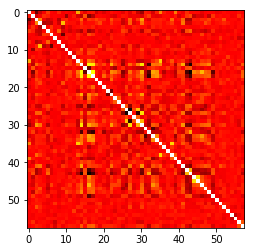

   MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0    0.073350 -0.045516    -0.220799 -0.207071  0.064216  0.750473   
1   -0.872264 -0.045516     0.460162 -0.091855  0.064216  0.750473   
2    0.073350 -0.045516    -0.084607  0.073455  0.064216 -1.378460   
3    0.309753 -0.045516    -0.447787 -0.096864  0.064216 -1.378460   
4    0.073350 -0.045516     0.641752  0.375020  0.064216 -1.378460   

   LandContour  Utilities  LotConfig  LandSlope      ...        OpenPorchSF  \
0     0.314559  -0.026171   0.604463  -0.225639      ...           0.216429   
1     0.314559  -0.026171  -0.628101  -0.225639      ...          -0.704242   
2     0.314559  -0.026171   0.604463  -0.225639      ...          -0.070337   
3     0.314559  -0.026171  -1.860664  -0.225639      ...          -0.175988   
4     0.314559  -0.026171  -0.628101  -0.225639      ...           0.563567   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold  \
0      -0.359202  -0.116299   

In [18]:
print('Novi oblik sa smanjenim brojem obelezja: ' + str(corr_db_train.shape))

plt.imshow(corr_db_train.corr(), cmap = 'hot', interpolation='nearest')
plt.show()

print(corr_db_train.head())

### 2)Primena sad za PCA, spustamo na 50 obelezja

In [19]:
#X podaci sa N obelezja
#k- X podaci sa k novih obelezja
def pca_redukcija(X, k):
    m = X.shape[0]
    n = X.shape[1]
    
    U = np.zeros(n)
    S = np.zeros(n)
    
    
    #koeficijent korelacije, trebace za singular value decomposition
    Sigma = np.corrcoef(np.transpose(X))
    #razlazemo na karakteristicne vektore korelacionu matricu
    U,S,V = np.linalg.svd(Sigma)
    
    
    Z = np.zeros((m,k))
    
    #uzimamo samo najbolje karakteristicne vektore, odnosno vektore koji najbolje
    #objasnjavaju promene u obelezjima
    Uredukovani = U[:,0:k]
    
    Z = np.dot(X, Uredukovani)
    
    return Z

Trenutni broj komponenti je 58, mi zelimo da sacuvamo samo 50
Novi oblik sa smanjenim brojem obelezja (PCA): (1460, 50)
Prikaz raznovrstosti za 10 obelezja


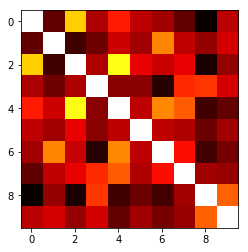

Prikaz raznovrstosti za 50 obelezja


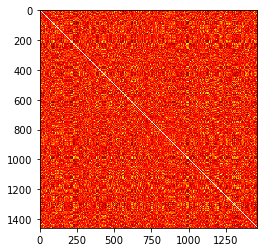

In [20]:
pca_db_train = corr_db_train
n = pca_db_train.shape[1]
print('Trenutni broj komponenti je ' + str(n) + ', mi zelimo da sacuvamo samo 50')

pca_db_train = pca_redukcija(corr_db_train, 50)

print('Novi oblik sa smanjenim brojem obelezja (PCA): ' + str(pca_db_train.shape))
print('Prikaz raznovrstosti za 10 obelezja');


#pca_db_train.corrcoef()
plt.imshow(np.corrcoef(pca_db_train[0:10]), cmap = 'hot', interpolation='nearest')
plt.show()


print('Prikaz raznovrstosti za 50 obelezja');

plt.imshow(np.corrcoef(pca_db_train), cmap = 'hot', interpolation='nearest')
plt.show()






## S obzirom da PCA daje neka svoja, nova obelezja, koja nemaju semanticki smisao (blizak coveku), onda nema sta da ispisujem nazive obelezja koja su ostala/izbacena(jer vise ni ne postoje u tom obliku).

#### Pretvaranje u pristojna imena promenljivih

In [21]:
X = pca_db_train
y = Y_corr

print(X.shape)
print(y.shape)

(1460, 50)
(1460,)


### Primena bibliotecke regresije 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_other, y_train, y_other = train_test_split(X,y, test_size=0.4)

regresija = linear_model.LinearRegression()
regresija.fit(X_train, y_train)
y_predvidjanje = regresija.predict(X_other)

print("Mean squared error: %.2f"
      % mean_squared_error(y_other, y_predvidjanje))

print('Variance score: %.2f' % r2_score(y_other, y_predvidjanje))

Mean squared error: 2163097943.81
Variance score: 0.68


### Vidimo da regresija za bibliotecku funkciju se dobro ponasa, nastavljam dalje, priprema za rucnu regularizacionu regresiju

In [26]:
def ridge_regresija(X, y, lam):
    #x transpose x
    X_temp = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    w = np.dot(np.linalg.pinv((np.dot(np.transpose(X_temp), X_temp) + np.dot(np.identity(X_temp.shape[1]), lam))),\
            np.dot(np.transpose(X_temp), y))
    return w


def hipotetska_funkcija(X, w):
    # dodajemo 1 na pocetak svakog primera, posto w ima jedan parametar vise
    X_temp = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    return np.dot(X_temp, w) 

def kriterijum_optimalnosti(N, X, w, y):
    return (0.5/N)* np.sum(np.square(hipotetska_funkcija(X, w) - y))

# alpha sluzi za procenu napredovanja regresije
# lambda je regularizacioni parametar
def ridge_regresija_gradijentna(X, y, lam, w, alpha, num_iter):

    N = X.shape[0]  # broj primera koji se koriste
    

    for i in range(num_iter):
        w[0] = w[0] - (1.0 / N) * alpha * np.sum(hipotetska_funkcija(X, w) - y)

        w[1:] = w[1:] - (1.0 / N) * alpha * \
                        np.dot(np.transpose(X), (hipotetska_funkcija(X, w) - y)) - lam/N*w[1:]
    
    return w

        


#(w,n)= ridge_regresija_gradijentna(corr_X_train, corr_y_train, 0, 1000)
#y_pred = np.dot(corr_X_test, w[1:])

# print('Rezultat treniranja neregulisanog dela je: ')
# print(r2_score(y_pred, corr_y_test))
# print(n)

## Istrazicemo da li je potrebno koristiti regularizacioni parametar za dalji rad

### Probamo jedan metod trazenja lambde. Prvo istreniramo nad 60% uzorka sa regularizacionim parametrom, pa na 20% biramo najbolji, i ostalih 20% merimo gresku i r2 skor

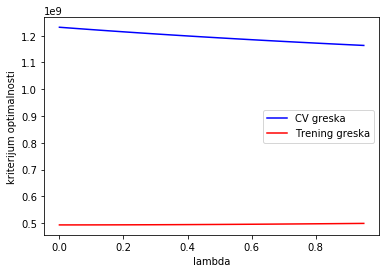

In [27]:
lam = np.arange(0,1, 0.05)
#lam = np.random.uniform(0,1)
r2_score_lam = np.empty([0,0])
kriterijum_cv = np.empty([0,0])
kriterijum_test = np.empty([0,0])
kriterijum_train = np.empty([0,0])

X_cv, X_test, y_cv, y_test = train_test_split(X_other, y_other, test_size=0.5)


#pretvaranje u ndarray oblik matrice (n,1),inace je (n,)

y_cv = y_cv.as_matrix()
y_cv = np.reshape(y_cv,(y_cv.shape[0], 1))

y_test = y_test.as_matrix()
y_test = np.reshape(y_test,(y_test.shape[0], 1))

y_train = y_train.as_matrix()
y_train = np.reshape(y_train,(y_train.shape[0], 1))


for lambda_uzorak in lam:
    #za treniranje parametara, ovaj deo se ne dira
    w_trening = np.random.rand(X_train.shape[1] + 1, 1)
    #w_trening = np.zeros((X_train.shape[1] + 1, 1))
    #istreniramo parametre
    w_novi = ridge_regresija_gradijentna(X_train,y_train, lambda_uzorak, w_trening, 0.01,1000)
    #w_novi = ridge_regresija(X_train, y_train, lambda_uzorak)
    #validiramo na cv setu
    y_predvidjanje = hipotetska_funkcija(X_cv, w_novi)
    #print('Za lamdbu %.2f' % lambda_uzorak)
    #print('\tVariance score: %.2f' % r2_score(y_cv, y_predvidjanje))
    
    
    #izracunamo cenu za kriterijume optimalnosti
    kriterijum_train = np.append(kriterijum_train, kriterijum_optimalnosti(\
                                             X_train.shape[0],X_train, w_novi, y_train ))
    kriterijum_cv = np.append(kriterijum_cv, kriterijum_optimalnosti(\
                                             X_cv.shape[0],X_cv, w_novi, y_cv))



    
plt.plot(lam, kriterijum_cv, 'b', label = 'CV greska')
plt.plot(lam, kriterijum_train, 'r', label = 'Trening greska')
plt.xlabel('lambda')
plt.ylabel('kriterijum optimalnosti')
plt.legend()







### Zakljucujem da je najbolje koristiti regularizacioni parametar 0.95 za optimizaciju. Racunam koeficijent determinacije za lamba = 0.95

In [28]:
lam = 0.95
w_trening = np.zeros((X_train.shape[1] + 1, 1))
w_novi = ridge_regresija_gradijentna(X_train,y_train, lam , w_trening, 0.05,1000)

y_predvidjanje = hipotetska_funkcija(X_test, w_novi)



print('Variance score: %.2f' % r2_score(y_test, y_predvidjanje))


Variance score: 0.75


# Istu  proveru sad vrsimo proveru da li je mozda bolje koristiti lasso i elastic net optimizaciju. 

### Lasso


In [29]:
def soft_thresholding(ro, lam):
    if(ro < -lam/2):
        return ro + lam/2
    if(-lam/2 <= ro and ro  <= lam/2):
        return 0
    if(ro > lam/2):
        return ro - lam/2

def lasso_ro(X,w,y,i):
    return np.dot(X[:,i], y - np.dot(X,w))

#koordinatni gradijentni spust
def lasso_regresija(X,y,lam, w,num_iter):
    N = X.shape[0]
    X_temp = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    print(lam)
    w[0] = np.sum(y - np.dot(X_temp[:,1:], w[1:]))/(X.shape[0])
    for num in range(num_iter):
        
        for i in range(1, w.shape[0]):
            tmp_w = copy.deepcopy(w)
            tmp_w[i] = 0.0
            ro = lasso_ro(X_temp,tmp_w,y,i)
            #reda radi, brisati posle
            #w[0] = ro
            #brisati iznad
            w[i] = soft_thresholding(ro, lam)
            z = np.sum(X_temp[:,i]**2)
            #preskakanje mogucnosti deljenja nulom
            if(z == 0):
                z = 1e-12
            w[i] = w[i]/z

        w[0] = np.sum(y - np.dot(X_temp[:, 1:], w[1:])) / (X_temp.shape[0])
        
    
    return w


### Vrsimo diskusiju l1 parametra koji najbolje prolazi

0.0
Za lamdbu 0.00
	Variance score: 0.74
0.05
Za lamdbu 0.05
	Variance score: 0.74
0.1
Za lamdbu 0.10
	Variance score: 0.74
0.15
Za lamdbu 0.15
	Variance score: 0.74
0.2
Za lamdbu 0.20
	Variance score: 0.74
0.25
Za lamdbu 0.25
	Variance score: 0.74
0.3
Za lamdbu 0.30
	Variance score: 0.74
0.35
Za lamdbu 0.35
	Variance score: 0.74
0.4
Za lamdbu 0.40
	Variance score: 0.74
0.45
Za lamdbu 0.45
	Variance score: 0.74
0.5
Za lamdbu 0.50
	Variance score: 0.74
0.55
Za lamdbu 0.55
	Variance score: 0.74
0.6
Za lamdbu 0.60
	Variance score: 0.74
0.65
Za lamdbu 0.65
	Variance score: 0.74
0.7
Za lamdbu 0.70
	Variance score: 0.74
0.75
Za lamdbu 0.75
	Variance score: 0.74
0.8
Za lamdbu 0.80
	Variance score: 0.74
0.85
Za lamdbu 0.85
	Variance score: 0.74
0.9
Za lamdbu 0.90
	Variance score: 0.74
0.95
Za lamdbu 0.95
	Variance score: 0.74


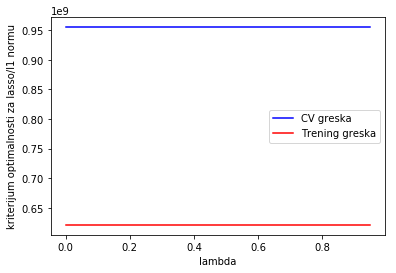

In [30]:
lam = np.arange(0,1, 0.05)
#lam = np.random.uniform(0,1)
r2_score_lam = np.empty([0,0])
kriterijum_cv = np.empty([0,0])
kriterijum_test = np.empty([0,0])
kriterijum_train = np.empty([0,0])

X_train, X_other, y_train, y_other = train_test_split(X,y, test_size=0.4)
X_cv, X_test, y_cv, y_test = train_test_split(X_other, y_other, test_size=0.5)

y_cv = y_cv.as_matrix()
y_cv = np.reshape(y_cv,(y_cv.shape[0], 1))

y_test = y_test.as_matrix()
y_test = np.reshape(y_test,(y_test.shape[0], 1))

y_train = y_train.as_matrix()
y_train = np.reshape(y_train,(y_train.shape[0], 1))

for lambda_uzorak in lam:
    #za treniranje parametara, ovaj deo se ne dira
    #w_trening = np.random.rand(X_train.shape[1] + 1, 1)
    w_trening = np.zeros((X_train.shape[1] + 1, 1))
    #istreniramo parametre
    #w_novi = ridge_regresija_gradijentna(X_train,y_train, lambda_uzorak, w_trening, 0.05,1000)
    
    w_novi = lasso_regresija(X_train,y_train,lambda_uzorak, w_trening,100)
    #validiramo na cv setu
    y_predvidjanje = hipotetska_funkcija(X_cv, w_novi)
    print('Za lamdbu %.2f' % lambda_uzorak)
    print('\tVariance score: %.2f' % r2_score(y_cv, y_predvidjanje))
    
    
    #izracunamo cenu za kriterijume optimalnosti
    kriterijum_train = np.append(kriterijum_train, kriterijum_optimalnosti(\
                                             X_train.shape[0],X_train, w_novi, y_train ))
    kriterijum_cv = np.append(kriterijum_cv, kriterijum_optimalnosti(\
                                             X_cv.shape[0],X_cv, w_novi, y_cv))




    
plt.plot(lam, kriterijum_cv, 'b', label = 'CV greska')
plt.plot(lam, kriterijum_train, 'r', label = 'Trening greska')
plt.xlabel('lambda')
plt.ylabel('kriterijum optimalnosti za lasso/l1 normu')
plt.legend()

### Zakljucujem da je svejedno da li cu korisiti regularizacioni parametar ili ne
### Uzmimo da je regularizacioni parametar l  = 0.5

In [31]:
lam = 0.5
w_trening = np.zeros((X_train.shape[1] + 1, 1))

w_novi = lasso_regresija(X_train,y_train, lam , w_trening,1000)

y_predvidjanje = hipotetska_funkcija(X_test, w_novi)


print('Variance score: %.2f' % r2_score_dusan(y_test, y_predvidjanje))

0.5
(292, 1)
(292, 1)
Variance score: 0.70


### Elastic Net - Scikit 

### Ovde diskutujemo za koje lambda1 i lambda2 ce se dobro ponasati elastic net regresija. Dve su konstante jer elastic net predstavlja regularizaciju i po l1 i l2 normi.
### Ovde se koristimo alpha-om i l1_normom, alpha stavljamo da je uvek 1, a posle cemo jednom transformacijom prebaciti u oblik po kojem se optimizovala formula, tj pokazacemo sta su lambda1 i lambda2

(50,)
Za l1 udeo 0.00
	Variance score: 0.77
(50,)
Za l1 udeo 0.05
	Variance score: 0.77
(50,)
Za l1 udeo 0.10
	Variance score: 0.78
(50,)
Za l1 udeo 0.15
	Variance score: 0.78
(50,)
Za l1 udeo 0.20
	Variance score: 0.78
(50,)
Za l1 udeo 0.25
	Variance score: 0.78
(50,)
Za l1 udeo 0.30
	Variance score: 0.79
(50,)
Za l1 udeo 0.35
	Variance score: 0.79
(50,)
Za l1 udeo 0.40
	Variance score: 0.79
(50,)
Za l1 udeo 0.45
	Variance score: 0.79
(50,)
Za l1 udeo 0.50
	Variance score: 0.80
(50,)
Za l1 udeo 0.55
	Variance score: 0.80
(50,)
Za l1 udeo 0.60
	Variance score: 0.80
(50,)
Za l1 udeo 0.65
	Variance score: 0.80
(50,)
Za l1 udeo 0.70
	Variance score: 0.80
(50,)
Za l1 udeo 0.75
	Variance score: 0.80
(50,)
Za l1 udeo 0.80
	Variance score: 0.81
(50,)
Za l1 udeo 0.85
	Variance score: 0.81
(50,)
Za l1 udeo 0.90
	Variance score: 0.81
(50,)
Za l1 udeo 0.95
	Variance score: 0.80


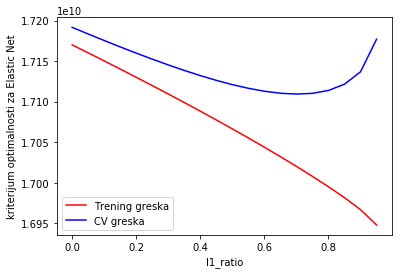

In [33]:
from sklearn.linear_model import ElasticNet

X_train, X_other, y_train, y_other = train_test_split(X,y, test_size=0.4)
X_cv, X_test, y_cv, y_test = train_test_split(X_other, y_other, test_size=0.5)


l1_ratio_array = np.arange(0,1, 0.05)

#r2_score_lam = np.empty([0,0])
kriterijum_cv = np.empty([0,0])
kriterijum_train = np.empty([0,0])

for l1_ratio_uzorak in l1_ratio_array:
    #istreniramo parametre
     
    regr = ElasticNet(random_state=0, l1_ratio = l1_ratio_uzorak, alpha = 1, max_iter = 1000)
    regr.fit(X_train, y_train)
    w_novi = regr.coef_
    print(w_novi.shape)
    y_predvidjanje = regr.predict(X_cv)
    
    print('Za l1 udeo %.2f' % l1_ratio_uzorak)
    print('\tVariance score: %.2f' % r2_score(y_cv, y_predvidjanje))
    

    
    N = X_train.shape[0]
    temp = (1/2.0/N)* np.sum(np.square(np.dot(X_train,w_novi) - y_train))
    kriterijum_train = np.append(kriterijum_train, temp)
    
    N = X_cv.shape[0]
    temp = (1/2.0/N)* np.sum(np.square(np.dot(X_cv,w_novi) - y_cv))
    kriterijum_cv = np.append(kriterijum_cv, temp)

#     regr = ElasticNet(random_state=0, l1_ratio = l1_ratio_uzorak, alpha = 20, max_iter = 1000)
#     regr.fit()





plt.plot(l1_ratio_array, kriterijum_train, 'r', label = 'Trening greska')
plt.plot(l1_ratio_array, kriterijum_cv, 'b', label = 'CV greska')

plt.xlabel('l1_ratio')
plt.ylabel('kriterijum optimalnosti za Elastic Net')
plt.legend()



### Zakljucujemo da je odnos u kojem l1 dominira najbolji za koriscenje u regularizaciji, te cemo njega koristiti u odnosu sa l2 kao l1:l2 = 0.9:0.1

In [34]:
l1_ratio_uzorak = 0.9
regr = ElasticNet(random_state=0, l1_ratio = l1_ratio_uzorak, alpha = 1, max_iter = 1000)
regr.fit(X_train, y_train)
w_novi = regr.coef_

N = X_train.shape[0]
y_predvidjanje = regr.predict(X_test)
print('\tVariance score: %.2f' % r2_score(y_test, y_predvidjanje))
    

	Variance score: 0.77


# Zakljucak:
### Nije bitno koji bih regularizacioni parametar koristio, posto se svi algoritmi relativno dobro ponasaju, ali nedovoljno da bi se on koristio za neke ozbiljnije predikcije, jer daje r2 skor izmedju 0.5 - 0.6. Zamerio bih na cinjenici da krajni test dosta zavisi od raspodele uzoraka za razlicite faze, pa bih verovatno vise proveo vremena u analizi obelezja, posto ocito da to predstavlja 'usko grlo' problema i velika dimenzionalnost problema u odnosu na broj uzoraka.

## Opcioni zadatak i dopuna projektu: 
## Uporediti r2 score sa naprednijim algoritmima za predvidjanje kao sto su Support Vector Regression i Gradient Boosting. Ovde iskljucivo koristim scikit biblioteku (ne ocekujte da znam tacnu implementaciju)

### SVR - Support Vector Regression + Gausov kernel (RBF)


In [35]:
from sklearn.svm import SVR

X_train, X_other, y_train, y_other = train_test_split(X,y, test_size=0.4)
X_cv, X_test, y_cv, y_test = train_test_split(X_other, y_other, test_size=0.5)

clf = SVR(kernel = 'rbf') #da se zna da je Gaus
print(X_train.shape)
print(y_train.shape)
clf.fit(X_train, y_train)
y_predvidjanje = clf.predict(X_test)


print('R2 skor za svr regresiju je: ' + str(r2_score_dusan(y_predvidjanje, y_test)))

(876, 50)
(876,)
(292,)
(292,)
R2 skor za svr regresiju je: -0.0221846263051


### Sad primenom Gradient Boosting-a proveravamo 

In [36]:
from sklearn import ensemble

X_train, X_other, y_train, y_other = train_test_split(X,y, test_size=0.4)
X_cv, X_test, y_cv, y_test = train_test_split(X_other, y_other, test_size=0.5)

clf = ensemble.GradientBoostingRegressor()
clf.fit(X_train, y_train)

y_predvidjanje = clf.predict(X_test)
#print(clf.score(X_test, y_test))
print("R2 skor za gradient boosting je " + str(r2_score_dusan(y_predvidjanje, y_test)))

(292,)
(292,)
R2 skor za gradient boosting je 0.746334452934
